### 导入车辆轨迹

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

from collections import Counter

fpath='../比赛/轨迹数据.txt'

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(fpath)#轨迹数据.txt 格式有问题，每个行尾多了个，号

In [3]:
# df2=df[df['vehicle-id']=='4c0c4745067197be22182d262b44f48a']
df2=df[df['vehicle-id']=='f3bc6bd1462edd25f7ae844143e8f65d']
df2.head()

,vehicle-id,time,x-coordinate,y-coordinate,speed,category
63,f3bc6bd1462edd25f7ae844143e8f65d,1493853530,521726.523312,55080.257718,12.8,1
64,f3bc6bd1462edd25f7ae844143e8f65d,1493853533,521689.796286,55057.042483,14.3,1
65,f3bc6bd1462edd25f7ae844143e8f65d,1493853536,521657.521151,55036.505930,12.8,1
66,f3bc6bd1462edd25f7ae844143e8f65d,1493853539,521623.020278,55016.862270,12.8,1
67,f3bc6bd1462edd25f7ae844143e8f65d,1493853542,521588.519545,54999.004397,13.1,1


In [26]:
def time_to_hour(x):
    dt=datetime.fromtimestamp(x)
    return dt.day

In [21]:
# dt=datetime.fromtimestamp(1493853539)
# dt.date(),dt.day

In [28]:
dt1=df2['time'].apply(time_to_hour)#没用
c=Counter(list(dt1))
c

Counter({4: 76})

In [6]:
x=list(df2['x-coordinate'])
#x[:10]
y=list(df2['y-coordinate'])
#y[:10]

In [7]:
from config import cross_cord

In [8]:
cx=[];cy=[]
for z in range(1,8):
#     print(z)
    cx.append(cross_cord[str(z)]['x'])
    cy.append(cross_cord[str(z)]['y'])
print(cx,cy)

[521677, 521580, 521520, 521452, 521433, 521411, 521400] [58109, 57466, 57059, 56668, 55855, 54822, 53998]


In [77]:
labels = ['X{0}'.format(i) for i in range(1,8)]
labels

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']

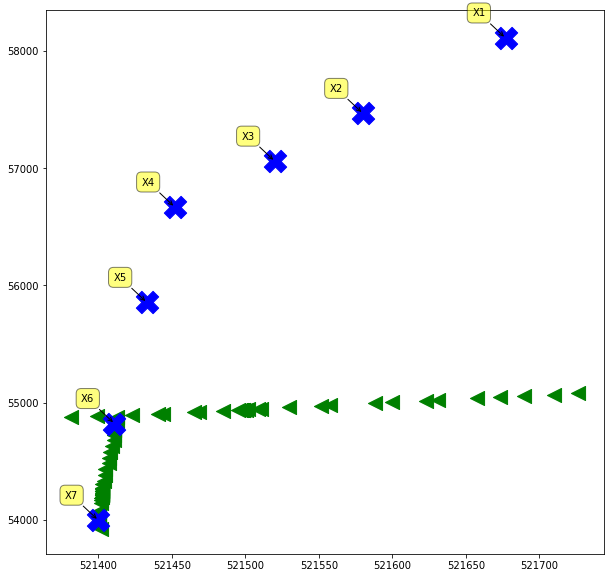

In [79]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(x,y, 200, color ='green',marker='<')
plt.scatter(cx,cy, 500, color ='blue',marker='X')
for label, x, y in zip(labels, cx, cy):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
plt.show()

## 经过哪些路口

In [9]:
#阈值
meet_distance=10#车离十字路口多远才算相遇
meet_cross_list=[]
distancelist=[]#所有距离

In [10]:
def dist(x1,x2,y1,y2,):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

In [11]:
for lon,lat in zip(x,y):
    #到路口的距离
    dist_list=[dist(lon,cx1,lat,cy1) for cx1,cy1 in zip(cx,cy)]
#     dist_list=[haversine(lon,cx1,lat,cy1) for cx1,cy1 in zip(cx,cy)]
    
    meet_cross_list.append(dist_list.index(min(dist_list)))
    distancelist+=(dist_list)
#     break

In [12]:
dist_list

[4195.876415632707,
 3548.3154130926359,
 3139.0609237602835,
 2746.288752073744,
 1933.0811766997174,
 899.87494620017378,
 75.841173664223547]

In [94]:
min(dist_list)

75.841173664223547

In [69]:
dist_list.index(min(dist_list))

1

In [95]:
dsl=sorted(distancelist)
dsl[-10:]

[3908.9521719172444,
 3918.7498441239045,
 3932.188301849947,
 3947.3303491056727,
 3974.0522999144541,
 4042.718551057254,
 4079.2421952973928,
 4120.2217391301365,
 4157.6394556365103,
 4195.876415632707]

In [110]:
dsl[:10]

[0.44301073629830162,
 12.302097542100984,
 12.302097542100984,
 21.705958244039877,
 37.433455884356917,
 41.14606334358573,
 52.472113501610806,
 52.472113501610806,
 54.703749335127839,
 64.490076960905682]

In [62]:
min(dsl)

657662.19081313675

In [63]:
from math import radians, cos, sin, asin, sqrt  
  
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）  
    """ 
    Calculate the great circle distance between two points  
    on the earth (specified in decimal degrees) 
    """  
    # 将十进制度数转化为弧度  
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])  
  
    # haversine公式  
    dlon = lon2 - lon1   
    dlat = lat2 - lat1   
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2  
    c = 2 * asin(sqrt(a))   
    r = 6371 # 地球平均半径，单位为公里  
    return c * r * 1000  

In [13]:
c=Counter(meet_cross_list)
c.most_common()#经过第6,7个路口
#不一定
#[(5, 48), (6, 25)],先经过第6个路口,再经过第7个路口

[(5, 51), (6, 25)]

In [76]:
len(meet_cross_list)

76

# 7个十字路口之间的距离

In [15]:
cr=[(a,b)  for a,b in zip(cx,cy)]
cr

[(521677, 58109),
 (521580, 57466),
 (521520, 57059),
 (521452, 56668),
 (521433, 55855),
 (521411, 54822),
 (521400, 53998)]

In [16]:
cross_distence=[]
for (a,b),(c,d) in zip(cr[:-1],cr[1:]):
    dst=dist(a,c,b,d)
#     print(dst)
    cross_distence.append(dst)
cross_distence  ,min(cross_distence)  

([650.275326304174,
  411.3988332506547,
  396.86899601757756,
  813.2219869137823,
  1033.234242560708,
  824.0734190592486],
 396.86899601757756)

In [18]:
min_distence=min(cross_distence)-10
min_distence#386.86899601757756

386.86899601757756

In [20]:
dist_list=[]
meet_cross_list=[]
for lon,lat in zip(x,y):
    #到路口的距离
    dist_list=[dist(lon,cx1,lat,cy1) for cx1,cy1 in zip(cx,cy)]
#     dist_list=[haversine(lon,cx1,lat,cy1) for cx1,cy1 in zip(cx,cy)]
#     dist_list=[di<min_distence for di in dist_list ]
    for i,di in enumerate(dist_list ):
        if di<min_distence :
            meet_cross_list.append(i)
    
#     meet_cross_list.append(dist_list.index(True))
#     distancelist+=(dist_list)
#     break
dist_list    

[4195.876415632707,
 3548.3154130926359,
 3139.0609237602835,
 2746.288752073744,
 1933.0811766997174,
 899.87494620017378,
 75.841173664223547]

In [21]:
print(meet_cross_list)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [22]:
#经过路口的先后顺序
passed_cross_order=[]
for cro in meet_cross_list:
    if cro not in passed_cross_order:
        passed_cross_order.append(cro)
passed_cross_order        

[5, 6]

In [120]:
#方向?
#东往西
# 用前3个坐标减去后3个坐标